In [10]:
!pip install -r requirements.txt

In [2]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

In [3]:
# We create our artificial data, where we seek to classify
# two concentric rings of data.
X, Y = make_circles(n_samples=500,factor=0.5,noise=0.05)

# Prediction map resolution
res = 100

In [4]:
# prediction map cordinates
_x0= np.linspace(-1.5,1.5,res)
_x1= np.linspace(-1.5,1.5,res)

In [5]:
# Input with each prediction map coordinate combo
_pX = np.array(np.meshgrid(_x0,_x1)).T.reshape(-1,2)

In [6]:
# empty object to 0.5 from prediction map
_pY = np.zeros((res,res)) + 0.5

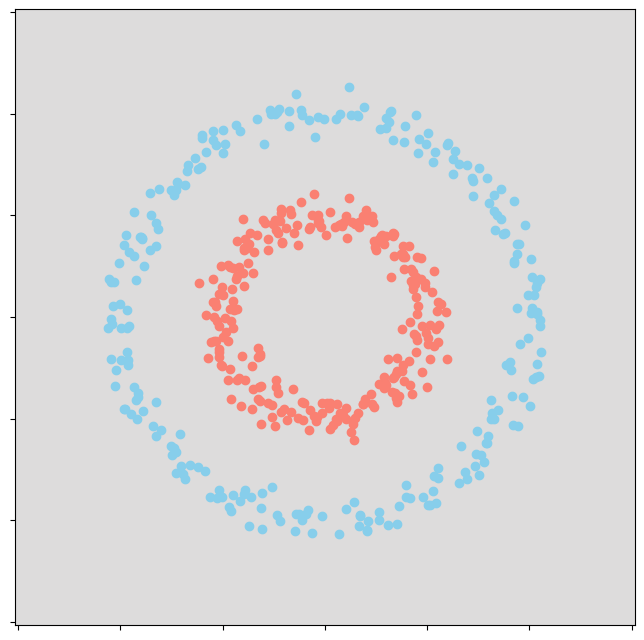

In [7]:
# Prediction map visualization
plt.figure(figsize=(8,8))
plt.pcolormesh(_x0, _x1, _pY, cmap="coolwarm",vmin=0, vmax=1)

# Data cloud visualization
plt.scatter(X[Y == 0,0], X[Y == 0,1],c="skyblue")
plt.scatter(X[Y == 1,0], X[Y == 1,1],c="salmon")

plt.tick_params(labelbottom=False,labelleft=False)

In [46]:
# Using TENSORFLOW
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from matplotlib import animation
from IPython.core.display import display, HTML

In [43]:
# we define imput points of net for X and Y matrix
iX = tf.placeholder('float', shape=[None, X.shape[1]])
iY = tf.placeholder('float', shape=[None])

lr = 0.01 #learning rate
nn = [2, 16, 8, 1] # number of neurons per layer

In [23]:
# layer 1
W1 = tf.Variable(tf.random_normal([nn[0], nn[1]]), name='Weights_1')
b1 = tf.Variable(tf.random_normal([nn[1]]), name='bias_1')
l1 = tf.nn.relu(tf.add(tf.matmul(iX, W1), b1))
# layer 2
W2 = tf.Variable(tf.random_normal([nn[1], nn[2]]), name='Weights_2')
b2 = tf.Variable(tf.random_normal([nn[2]]), name='bias_2')
l2 = tf.nn.relu(tf.add(tf.matmul(l1, W2), b2))
# layer 3
W3 = tf.Variable(tf.random_normal([nn[2], nn[3]]), name='Weights_3')
b3 = tf.Variable(tf.random_normal([nn[3]]), name='bias_3')
# Prediction vector of Y
pY = tf.nn.sigmoid(tf.add(tf.matmul(l2, W3), b3))[:, 0]

# Testing of predictions
loss = tf.losses.mean_squared_error(pY, iY)

# We define the network optimizer to reduce the error.
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.05).minimize(loss)
n_steps= 1000 # Number of training cycles
iPY = [] # Save prediction evolution to animation

Step 0 / 1000 - Loss =  0.28312322 - Acc = 0.668
Step 25 / 1000 - Loss =  0.1720596 - Acc = 0.832
Step 50 / 1000 - Loss =  0.13465486 - Acc = 0.886
Step 75 / 1000 - Loss =  0.1113879 - Acc = 0.912
Step 100 / 1000 - Loss =  0.093998015 - Acc = 0.934
Step 125 / 1000 - Loss =  0.07918746 - Acc = 0.94
Step 150 / 1000 - Loss =  0.06566018 - Acc = 0.95
Step 175 / 1000 - Loss =  0.05530424 - Acc = 0.96
Step 200 / 1000 - Loss =  0.047251903 - Acc = 0.966
Step 225 / 1000 - Loss =  0.040637847 - Acc = 0.988
Step 250 / 1000 - Loss =  0.035164762 - Acc = 0.992
Step 275 / 1000 - Loss =  0.030590039 - Acc = 0.998
Step 300 / 1000 - Loss =  0.026911924 - Acc = 1.0
Step 325 / 1000 - Loss =  0.023823852 - Acc = 1.0
Step 350 / 1000 - Loss =  0.021264523 - Acc = 1.0
Step 375 / 1000 - Loss =  0.01910674 - Acc = 1.0
Step 400 / 1000 - Loss =  0.017270964 - Acc = 1.0
Step 425 / 1000 - Loss =  0.01570683 - Acc = 1.0
Step 450 / 1000 - Loss =  0.014394002 - Acc = 1.0
Step 475 / 1000 - Loss =  0.01326927 - Acc = 

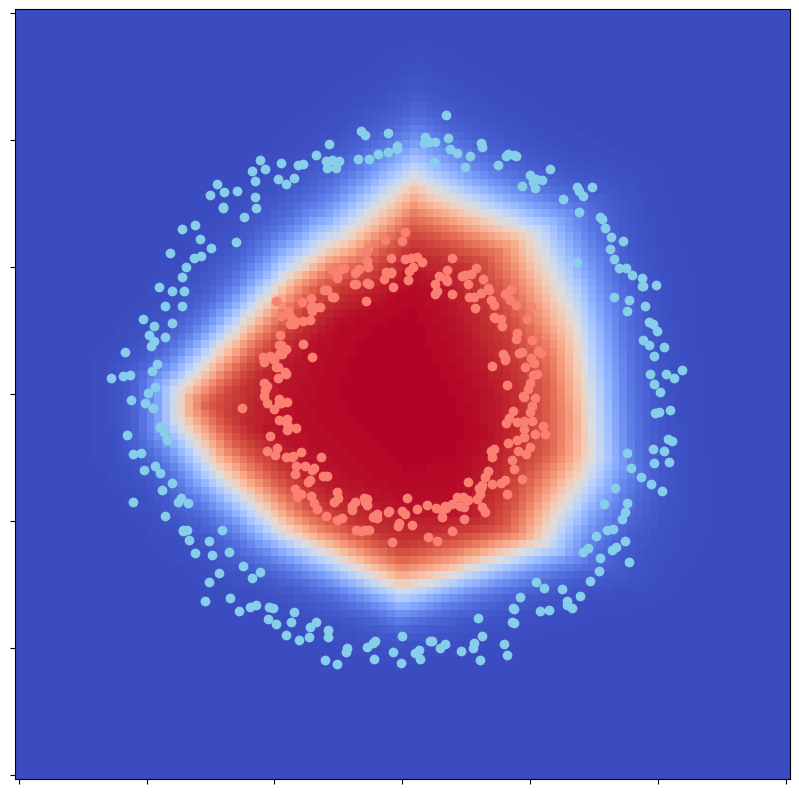

In [34]:
with tf.Session() as sess:
  # We start each network parameter, matrices w and b.
  sess.run(tf.global_variables_initializer())
  # We  iterate over nth steps
  for step in range(n_steps):
    _, _loss, _pY = sess.run([optimizer, loss, pY], feed_dict={iX : X, iY : Y})
    # each 25 iterations, print metrics
    if step % 25 == 0:
      # caclculate accuracy
      acc = np.mean(np.round(_pY) == Y)
      # we print metrics
      print('Step',step,'/',n_steps,'- Loss = ', _loss, '- Acc =',acc)
      # We get predictions for each prediction map point _px
      _pY = sess.run(pY, feed_dict={iX : _pX}).reshape((res,res))
      # save to visualize animation
      iPY.append(_pY)

# ------------ANIMATION CODE------------#
ims = []
fig = plt.figure(figsize=(10, 10))
print("--- Generating animation")

for fr in range(len(iPY)):
  im = plt.pcolormesh(_x0, _x1, iPY[fr], cmap="coolwarm",animated=True)
  #data cloud visualization
  plt.scatter(X[Y == 0,0], X[Y == 0,1], c="skyblue")
  plt.scatter(X[Y == 1,0], X[Y == 1,1], c="salmon")
  # plt.title("Clasification result")
  plt.tick_params(labelbottom=False, labelleft=False)
  ims.append([im])
ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)
HTML(ani.to_html5_video())

In [8]:
print("------------------KERAS--------------------")
import  tensorflow as tf
tf.compat.v1.enable_v2_behavior()
print(tf.executing_eagerly())
import tensorflow.keras as kr


------------------KERAS--------------------
True


In [9]:
from IPython.core.display import display, HTML

lr = 0.01 #learning rate
nn = [2, 16, 8, 1] # number of neurons per layer

# We create the object that will contain our neural network,
# as a sequence of layers
model = kr.Sequential()

# add layer 1
l1 = model.add(kr.layers.Dense(nn[1], activation='relu'))

# add layer 2
l2 = model.add(kr.layers.Dense(nn[2], activation='relu'))

# add layer 3
l3 = model.add(kr.layers.Dense(nn[3], activation='sigmoid'))

model.compile(loss='mse', optimizer=kr.optimizers.SGD(learning_rate=0.05), metrics=['acc'])

model.fit(X, Y, epochs=100)

Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 0.2417 - acc: 0.5040
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.2404 - acc: 0.5260
Epoch 3/100
16/16 [==============================] - 0s 1ms/step - loss: 0.2392 - acc: 0.5380
Epoch 4/100
16/16 [==============================] - 0s 1ms/step - loss: 0.2379 - acc: 0.5520
Epoch 5/100
16/16 [==============================] - 0s 1ms/step - loss: 0.2366 - acc: 0.5760
Epoch 6/100
16/16 [==============================] - 0s 1ms/step - loss: 0.2354 - acc: 0.5760
Epoch 7/100
16/16 [==============================] - 0s 1ms/step - loss: 0.2340 - acc: 0.5840
Epoch 8/100
16/16 [==============================] - 0s 1ms/step - loss: 0.2327 - acc: 0.5940
Epoch 9/100
16/16 [==============================] - 0s 1ms/step - loss: 0.2312 - acc: 0.5960
Epoch 10/100
16/16 [==============================] - 0s 1ms/step - loss: 0.2297 - acc: 0.6160
Epoch 11/100
16/16 [==============================] - 0s 1m